## Section3 Part3 Compare the proportion of reads contains RepeatMask
#### Ke Liu

In [ ]:
import os
import subprocess as sp
import pandas as pd
import numpy as np
import math
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import pysam as ps
import time
import matplotlib.font_manager as font_manager
from tqdm import tqdm
font_manager.fontManager.addfont('/home/qukun/liuke/miniconda3/fonts/Arial.ttf')
mpl.rcParams['font.family'] = ['Arial'] 

In [2]:
all_protocols = ['ATAC','DNAT' ,'DSAT', 'DNARCAT', 'DNARCAU', 'DSARCAT', 'DSARCAU', 'DNRT7', 'DSRT7', 'Nanopore_WGS', 'NGS_WGS' ]
methods = ['WGS-SR', 'WGS-LR', 'ATAC', '3SEP-SR', '3SEP-LR', 'Circle-seq-SR', 'Circle-seq-LR']
protocols = ['NGS_WGS', 'Nanopore_WGS', 'ATAC', 'DSAT', 'DSRT7', 'DNARCAU', 'DNRT7']
samples = ['{0}{1}'.format(a,b) for a in protocols for b in [1,2,3]]
#methods_protocols = {'Circle-Seq-SR':'DNARCAU', '3SEP-SR':'DSARCAT', 'Circle-Seq-LR':'DNRT7', '3SEP-LR':'DSRT7', 'ATAC':'ATAC', 'WGS-SR':'NGS_WGS', 'WGS-LR':'Nanopore_WGS'}
protocols_methods = dict(zip(protocols, methods))
palette= {'Circle-seq-LR':'#ef6398', 'Circle-seq-SR':'#f9b035', '3SEP-LR':'#e35f5f', '3SEP-SR':'#fedd04', 'ATAC':'#52b97f','WGS-LR': '#3bb3cf', 'WGS-SR': '#377fb2'}

##### 0 PBS script to run samtools extract reads map to the repeat bed regions 

##### 1 Count reads mapped to genome and repeat region 

In [3]:
def count_reads(bam_file):
    bam = ps.AlignmentFile(bam_file, "rb")
    reads = bam.mapped
    bam.close()
    return reads

In [4]:
reads_df = pd.DataFrame(columns=['total','LTR', 'SINE', 'LINE', 'Satellite'])
plot_df = pd.DataFrame(columns=['LTR', 'SINE', 'LINE', 'Satellite'])

In [5]:
for sample in ['ATAC', 'DNARCAU', 'DSAT', 'NGS_WGS']:
    for i in range(1,4):
        total_bam = '/home/qukun/liuke/workspace/benchmark/result/2nd/bam/%s%i.bam' % (sample,i)
        reads_df.loc['%s%s' %(sample,i), 'total'] = count_reads(total_bam)
        for repeat in ['LTR', 'SINE', 'LINE', 'Satellite']:
            repeat_bam = '/home/qukun/liuke/workspace/benchmark/result/annotation/count/%s%i.%s' % (sample,i,repeat)
            reads_df.loc['%s%s' %(sample,i), repeat] = count_reads(repeat_bam)

In [6]:
for sample in ['DNRT7', 'DSRT7', 'Nanopore_WGS']:
    for i in range(1,4):
        total_bam = '/home/qukun/liuke/workspace/benchmark/result/3rd/bam/%s%i.bam' % (sample,i)
        reads_df.loc['%s%s' %(sample,i), 'total'] = count_reads(total_bam)
        for repeat in ['LTR', 'SINE', 'LINE', 'Satellite']:
            repeat_bam = '/home/qukun/liuke/workspace/benchmark/result/annotation/count/%s%i.%s' % (sample,i,repeat)
            reads_df.loc['%s%s' %(sample,i), repeat] = count_reads(repeat_bam)

In [7]:
for sample in ['ATAC', 'DNARCAU', 'DSAT', 'NGS_WGS','DNRT7', 'DSRT7', 'Nanopore_WGS']:
     for i in range(1,4):
        for repeat in ['LTR', 'SINE', 'LINE', 'Satellite']:
            plot_df.loc['%s%s' %(sample,i), repeat] = reads_df.loc['%s%s' %(sample,i), repeat] / reads_df.loc['%s%s' %(sample,i), 'total']
plot_df.insert(0,'Methods',plot_df.index)
plot_df.Methods = plot_df.Methods.apply(lambda x: protocols_methods[x[:-1]])

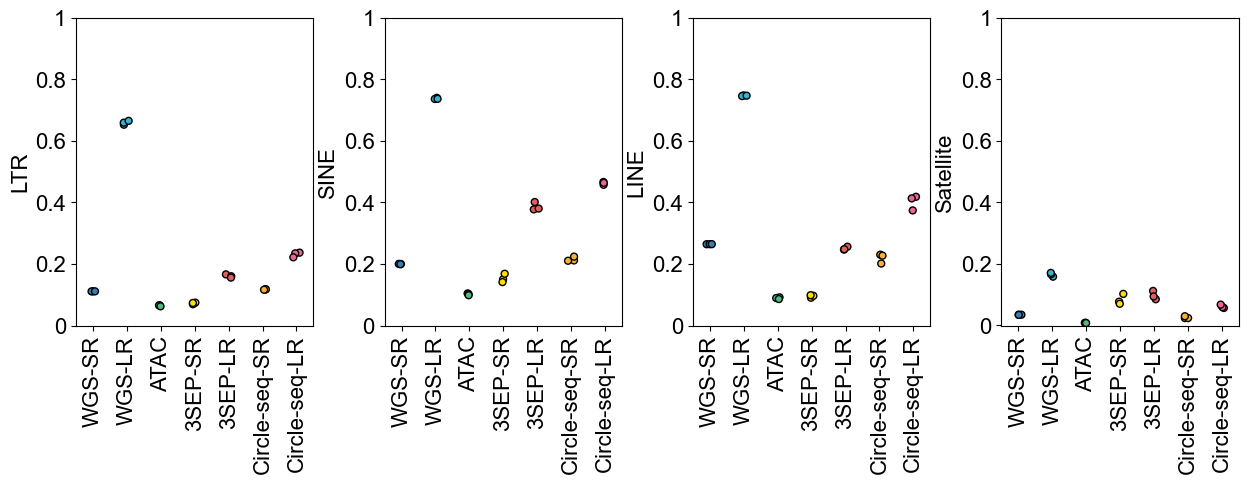

In [9]:
plot_df=pd.read_csv('/home/qukun/liuke/workspace/benchmark/figure/figure3_repeats.csv',sep='\t')
fig = plt.figure(figsize=(15,4))
subplot = gs.GridSpec(1, 4,hspace=0.05, wspace=.3)
repeat_list = ['LTR', 'SINE', 'LINE', 'Satellite']

for i in range(4):
    locals()['ax%i' %i] = fig.add_subplot(subplot[0, i])
    sns.stripplot(data=plot_df,
                  x='Methods',
                  y=repeat_list[i],
                  hue='Methods',
                  order=['WGS-SR','WGS-LR','ATAC','3SEP-SR','3SEP-LR','Circle-seq-SR','Circle-seq-LR'],
                  edgecolor='black',
                  linewidth=1,
                  palette=palette,
                  dodge=False,
                  ax=locals()['ax%i' %i])
    locals()['ax%i'%i].legend_.remove()
    locals()['ax%i'%i].set_xticks(methods)
    locals()['ax%i'%i].set_xticklabels(methods,rotation=90,fontsize=16)
    locals()['ax%i'%i].set_xlabel('')
    locals()['ax%i'%i].set_yticks([0,.2,.4,.6,.8,1],[0,.2,.4,.6,.8,1],fontsize=16)
    locals()['ax%i'%i].set_ylabel('%s'%repeat_list[i], fontsize=16)
plt.savefig('/home/qukun/liuke/workspace/benchmark/Figure/figure3e_repeats.pdf', dpi=2000, bbox_inches='tight')
plot_df.to_csv('/home/qukun/liuke/workspace/benchmark/Figure/figure3e_repeats.csv',sep='\t')